In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs

In [26]:
sp_shp = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/raw/municipio_sp.shp')

In [5]:
gdf_agencias_sp = pd.read_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/agencias_latlong.csv', sep=';')

In [6]:
# Set crs to use degrees in the first moment
# https://gis.stackexchange.com/questions/345071/matching-x-and-y-axis-coordinates-of-two-geopandas-geometries-to-overlay-them
gdf_agencias_sp_points = gpd.GeoDataFrame(gdf_agencias_sp, geometry=gpd.points_from_xy(gdf_agencias_sp['lon'], gdf_agencias_sp['lat']), crs=4326)

In [7]:
# Then, set the crs of points to the crs of shapefile map which is in meters
gdf_agencias_sp_points = gdf_agencias_sp_points.to_crs(sp_shp.crs)

In [8]:
# Spatial join to get only the points inside polygon
gdf_agencias_sp_points_join = gpd.sjoin(gdf_agencias_sp_points, sp_shp, predicate='within')

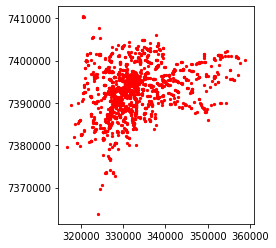

In [9]:
gdf_agencias_sp_points_join.plot(marker='o', color='red', markersize=5);

In [51]:
sp_shp = sp_shp.to_crs(epsg=4326)

In [52]:
gdf_agencias_sp_points_join = gdf_agencias_sp_points_join.to_crs(epsg=4326)

C:\Users\Ricardo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Ricardo\Anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


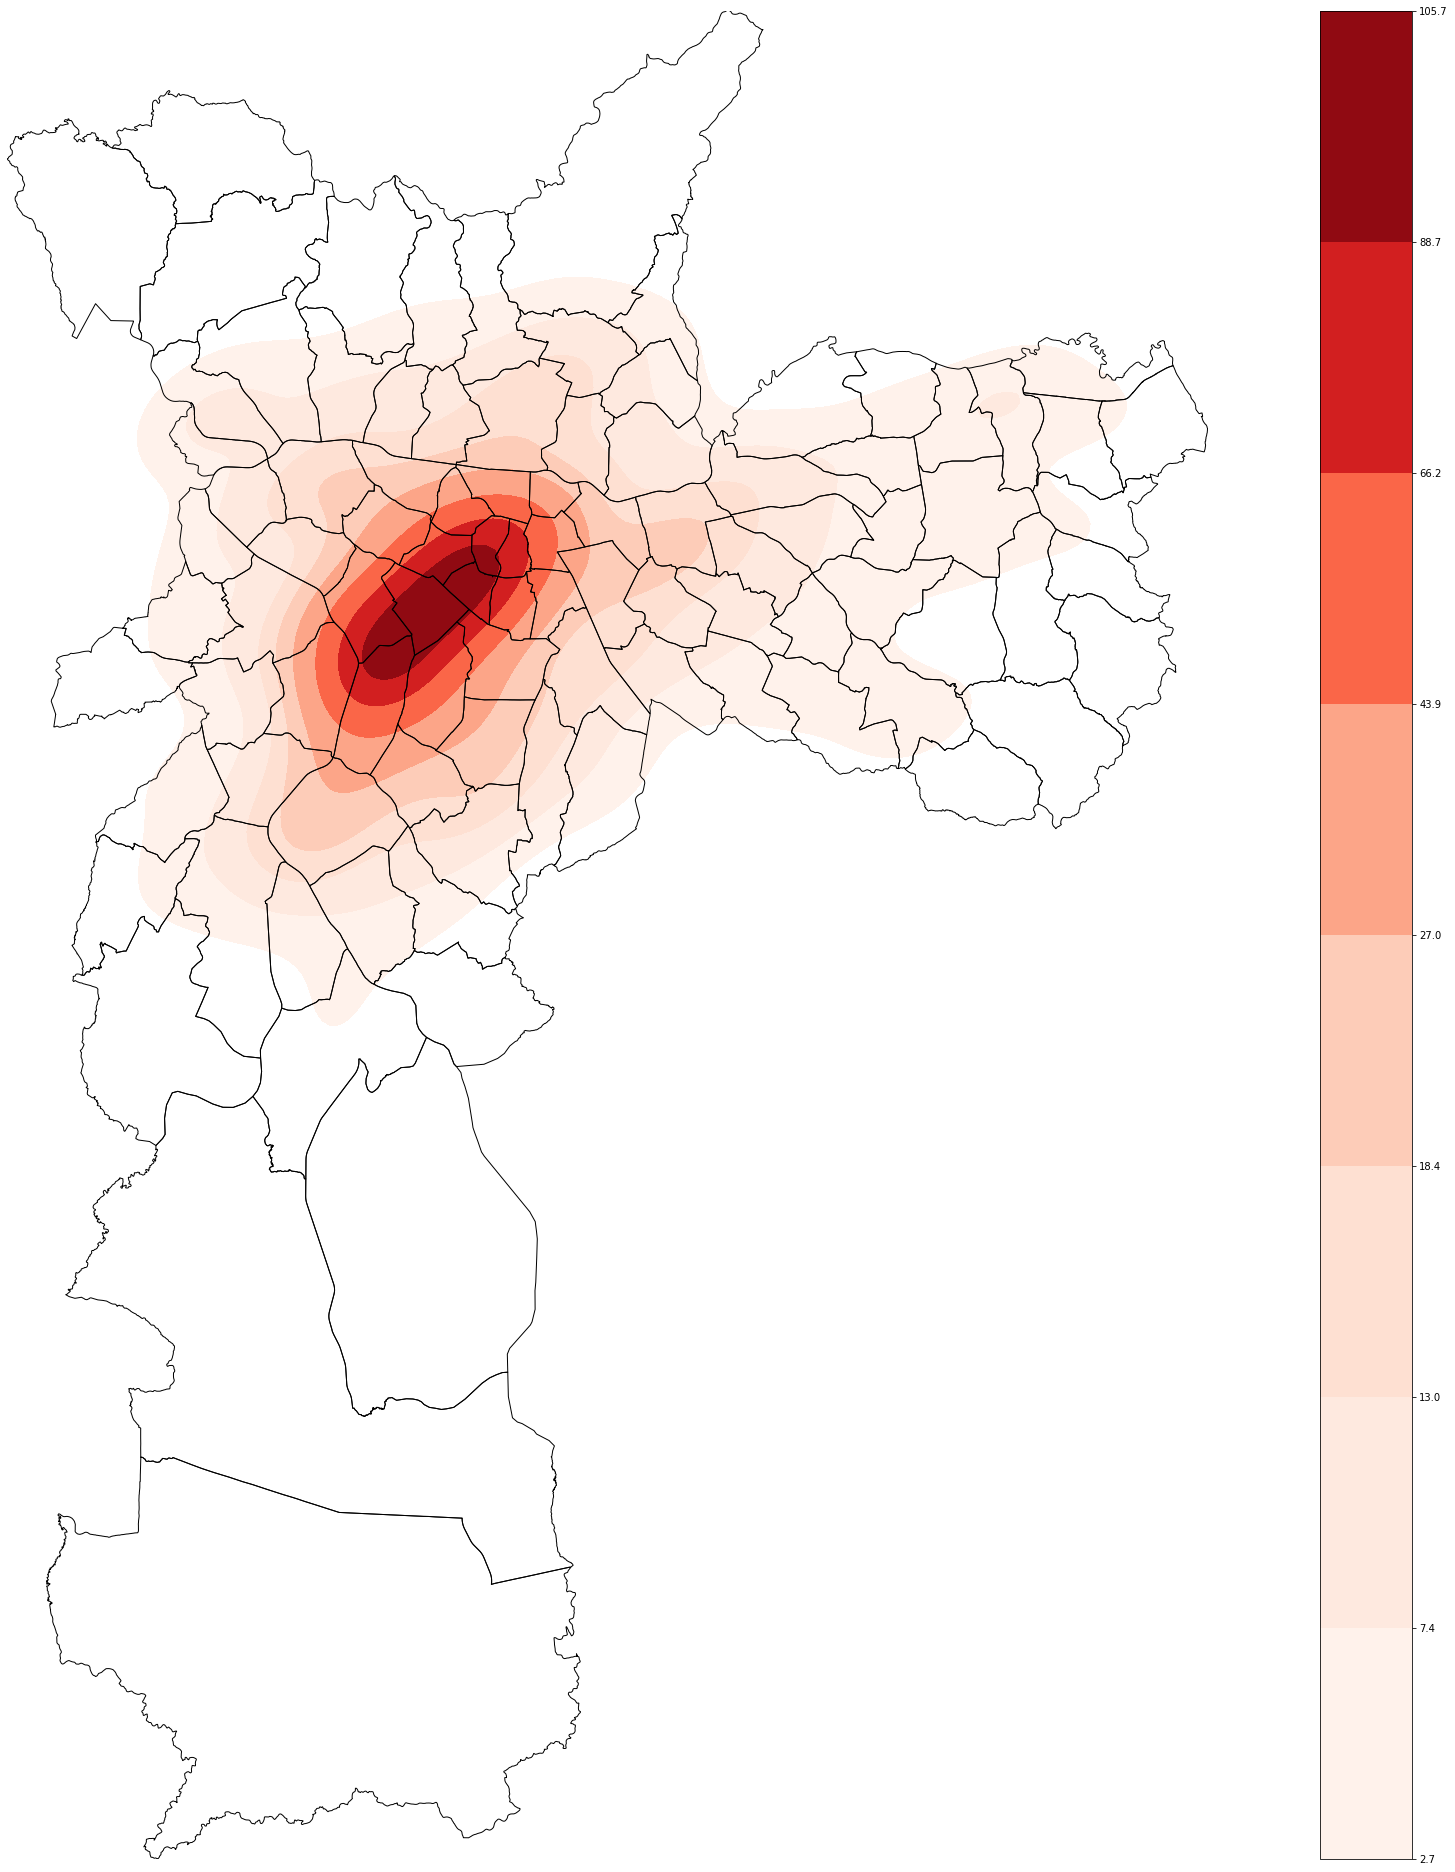

In [112]:
# https://residentmario.github.io/geoplot/plot_references/plot_reference.html?highlight=clip#kdeplot
# https://geopandas.org/en/stable/gallery/plotting_with_geoplot.html?highlight=heatmap
# https://residentmario.github.io/geoplot/api_reference.html?highlight=albersequalarea#geoplot.crs.AlbersEqualArea

# Calculate the bounds of the to kdeplot print all its extension
extent= sp_shp.total_bounds

ax = gplt.polyplot(sp_shp, projection=gcrs.Orthographic(), zorder=1, figsize=(40, 34))
gplt.kdeplot(gdf_agencias_sp_points_join, cmap='Reds', shade=True, n_levels=9, extent=extent, cbar=True, ax=ax)
# gplt.kdeplot(gdf_agencias_sp_points_join, cmap='Reds', shade=True, shade_lowest=True, n_levels=9, extent=extent, cbar=True, clip=sp_shp, ax=ax)

In [83]:
sp_shp.geometry

0     POLYGON ((-46.44623 -23.55651, -46.44610 -23.5...
1     POLYGON ((-46.75838 -23.64859, -46.75835 -23.6...
2     POLYGON ((-46.47502 -23.52381, -46.47501 -23.5...
3     POLYGON ((-46.75600 -23.49516, -46.75599 -23.4...
4     POLYGON ((-46.58148 -23.57298, -46.58145 -23.5...
                            ...                        
91    POLYGON ((-46.58508 -23.52832, -46.58519 -23.5...
92    POLYGON ((-46.65081 -23.59868, -46.65080 -23.5...
93    POLYGON ((-46.54827 -23.53505, -46.54842 -23.5...
94    POLYGON ((-46.66362 -23.53701, -46.66355 -23.5...
95    POLYGON ((-46.64631 -23.53909, -46.64607 -23.5...
Name: geometry, Length: 96, dtype: geometry